<table width="100%" style="padding:0; margin-left:-6px;">
    <tr style="padding=0;" width="100%">
        <td width="auto">
           <hr style="border:2px solid darkblue">
            <h1> nb6. Query by frequency</h1>
           <hr style="border:2px solid darkblue">
        </td>
        <td width="60px">
           <img src="ALMAsmall.png" align="right"/> 
        </td>
    </tr>
</table>    


The relevant columns of the ALMA TAP service are:
* *frequency*  : central frequency of the observation
* *bandwidth*   : bandwidth of the observation/Spectral Window


-----------

Import all necessary modules:

In [1]:
import numpy as np
import astropy
import pyvo
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

service = pyvo.dal.TAPService("https://almascience.eso.org/tap")      # for the EU ALMA TAP service

# service = pyvo.dal.TAPService("https://almascience.nao.ac.jp/tap")  # for the EA ALMA TAP service
# service = pyvo.dal.TAPService("https://almascience.nrao.edu/tap")   # for the NA ALMA TAP service

<hr style="border:2px solid darkblue"> </hr>

## Query observations covering a frequency range

<hr style="border:2px solid darkblue"> </hr>

The ALMA archive metadata contain the central frequency of the observations in the *frequency* column and width of the spectral window in the *bandwidth* column of each observation. In this function we see which observations do overlap with the frequency range given by the user.

In [2]:
def query_spectral_range(service, science_category, freq_min, freq_max):
    """Returns all observations that have (a portion of) their spectral coverage overlapping the range freq_min to freq_max
        
       service               pyvo TAPService instance
       science_category      (substring of) one of the ALMA science science categories (see +Notebook 4)
       freq_min              minimum frequency of the requested coverage (GHz)
       freq_max              maximum frequency of the requested coverage (GHz)
              
       returns               pandas table with frequency (GHz) and bandwidth (GHz)
    """

    query = f"""   
            SELECT member_ous_uid, target_name, frequency, bandwidth
            FROM ivoa.obscore   
            WHERE (frequency - 0.5 * bandwidth/1e9) < {freq_max} AND (frequency + 0.5 * bandwidth/1e9) > {freq_min} AND scientific_category like '%{science_category}%'
            """
    
    return service.search(query).to_table().to_pandas()

<hr style="border:2px solid darkblue"> </hr>

## Plot all frequency ranges covered by one source

<hr style="border:2px solid darkblue"> </hr>

This function allows the user to read out all frequency ranges covered for one source. To achieve this we need to use the *frequency_support column*. This column contains strings including the frequency limits of each spectral window within each measurent set, sensivity and polarization information. We will show how to apply this function for a source in example 6b.

In [3]:
def plot_all_frequencies(output_table):
    """Plots the frequencies and bandwidths for all of the observations in the output table
    
    output_table      pandas output table with frequency (GHz) and bandwidth (Hz) column
    
    returns           None   
    """

    plt.rcParams["figure.figsize"] = (20,20)
    fig, ax = plt.subplots()
    ax.plot([0,len(output_table['frequency'])],[84,480], alpha = 0)
    
    for i in range(len(output_table['frequency'])):
        freq_min = output_table['frequency'][i] - output_table['bandwidth'][i]/1e9/2
        freq_max = output_table['frequency'][i] + output_table['bandwidth'][i]/1e9/2
        left, bottom, width, height = (i, freq_min, 0.5,  freq_max - freq_min )
        ax.add_patch(Rectangle((left,bottom), width, height))

    ### Code each band
    ax.add_patch(Rectangle((-3,84),2,116-84,   facecolor = 'blue'))
    ax.add_patch(Rectangle((-3,125),2,163-125, facecolor = 'red'))
    ax.add_patch(Rectangle((-3,163),2,211-163, facecolor = 'green'))
    ax.add_patch(Rectangle((-3,211),2,275-211, facecolor = 'orange'))
    ax.add_patch(Rectangle((-3,275),2,373-275, facecolor = 'yellow'))
    ax.add_patch(Rectangle((-3,385),2,500-385, facecolor = 'magenta'))

    plt.title('Frequency coverage for "SPT0311-58"',fontsize=15)
    plt.xlabel('Observations',fontsize=15)
    plt.ylabel('Frequency [GHz]',fontsize=15)

-----------------

## Example 6a: Query all 'active galaxies' (science category) with frequencies between 200-400 GHz


In [4]:
output = query_spectral_range(service, 'Active galaxies', 200, 400)

Text(0.5, 0, 'Objects')

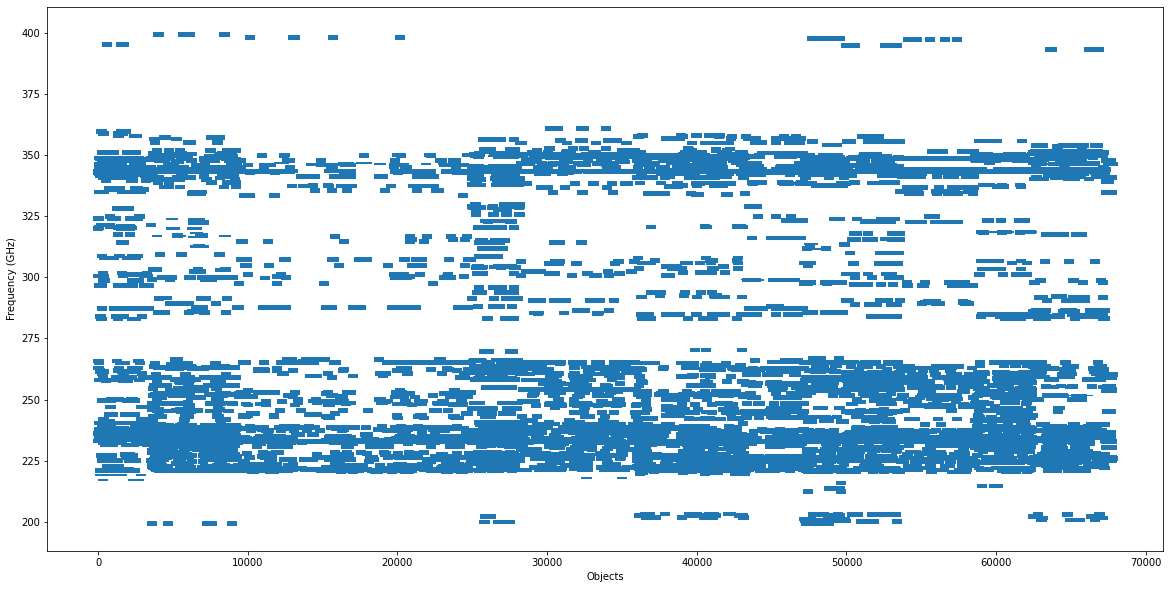

In [5]:
plt.rcParams["figure.figsize"] = (20,10)
plt.errorbar(np.arange(len(output['frequency'])), output['frequency'], yerr=output['bandwidth']/1e9/2, 
    elinewidth = 10,marker = '',ls = '')
plt.ylabel('Frequency (GHz)')
plt.xlabel('Objects')


-------------------------------------------------------------

## Example 6b: Display all frequencies covered for one source

We first need to query all observations available for one specific source. In this example we use the sub-mm galaxy SPT0311-58. This galaxy is not in Sesame (Simbad, NED or VizieR) but has been observed by ALMA:

In [6]:
query = f"""SELECT * FROM ivoa.obscore WHERE target_name = 'SPT0311-58'"""
result = service.search(query)
output = result.to_table().to_pandas()

We can now use the function *read_band_freq()* to visualize the frequency coverage of each spectral window observed for this source.

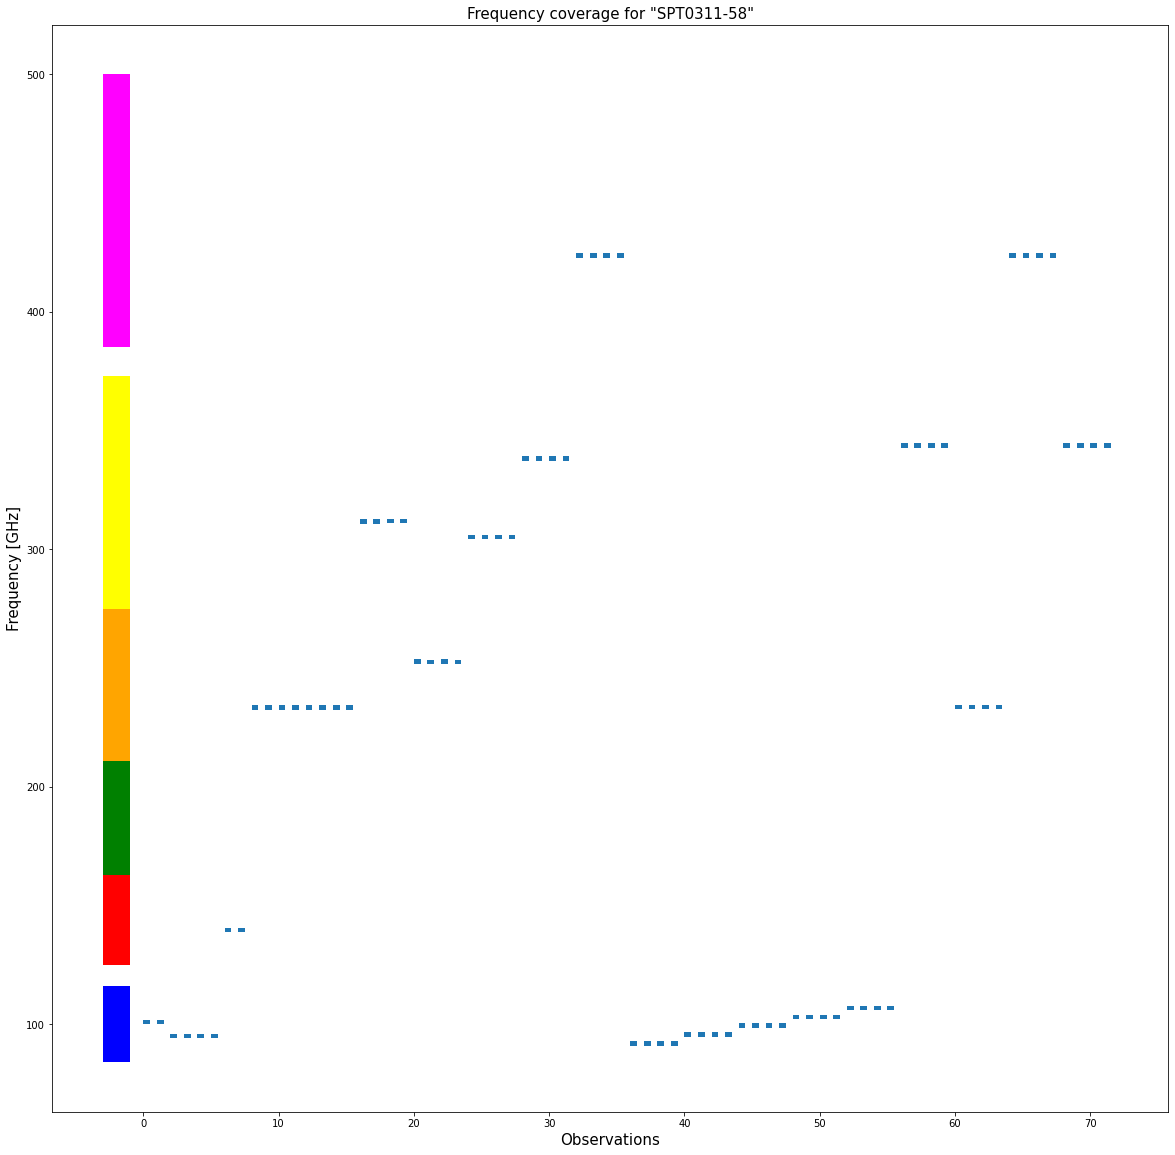

In [7]:
plot_all_frequencies(output)